# Regressie - intro

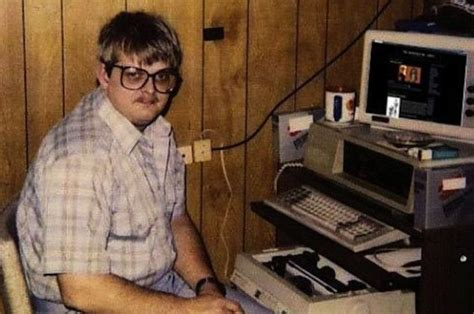

## Install

In [1]:
!pip3 install numpy
!pip3 install scipy

## Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [5]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [195]:
offset = 25000
prijs_oppervlak = 5000

#prijs= offset + prijs_oppervlak * oppervlak

def prijs(oppervlak, offset, prijs_oppervlak):
    return (offset + prijs_oppervlak * oppervlak)

#p = prijs(offset, prijs_oppervlak, 75)
#print(p)


### Stap 2: Bekijk interval [50, 75] m2

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [196]:
# Use scipy optimize package
from scipy.optimize import curve_fit

xdata = np.linspace(50, 250, 51)
p = prijs(xdata, offset, prijs_oppervlak)
#xdata moet op de 1e plek, want = oppervlak

print(p)

[ 275000.  295000.  315000.  335000.  355000.  375000.  395000.  415000.
  435000.  455000.  475000.  495000.  515000.  535000.  555000.  575000.
  595000.  615000.  635000.  655000.  675000.  695000.  715000.  735000.
  755000.  775000.  795000.  815000.  835000.  855000.  875000.  895000.
  915000.  935000.  955000.  975000.  995000. 1015000. 1035000. 1055000.
 1075000. 1095000. 1115000. 1135000. 1155000. 1175000. 1195000. 1215000.
 1235000. 1255000. 1275000.]


## Stap 4: Extrapoleer

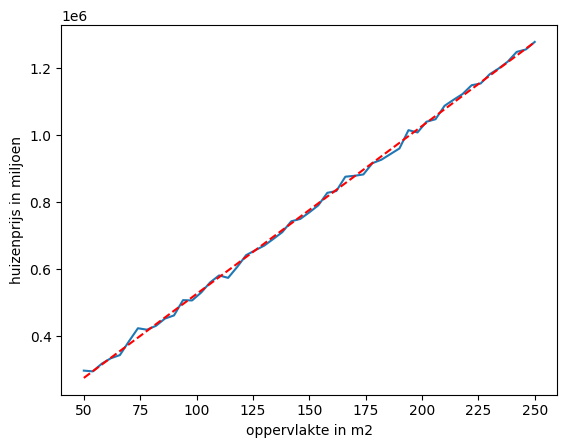

[ 297434.11268846  295232.57093192  318352.05663643  334391.8207379
  343784.70578493  384703.19492491  423861.31509853  419541.73252649
  431110.81095237  452772.98407959  462116.30110627  507688.80319706
  506808.28891917  530018.10217343  560416.64490088  581469.61875797
  574168.17519534  606436.93019782  642005.03483719  656341.97600072
  670313.62825974  690041.94768605  710240.90202907  742867.9363768
  749932.88800018  769504.58978894  790464.03925664  827868.87796856
  833232.7786663   875989.64334732  878587.03224049  882680.81612464
  916298.265076    926646.63796425  943459.75815977  960242.75119738
 1014757.65337    1007969.12767305 1039978.35210829 1047430.80390871
 1087483.14511255 1105482.92753987 1122591.44316793 1148807.95351316
 1153989.64538846 1181489.66606411 1198781.16253363 1219030.04721217
 1248288.018147   1255318.53362618 1278027.47386514]
[25195.78680023  5009.34229191]


In [202]:
# Create fit

# Plot prediction for whole range

rng = np.random.default_rng()
prijs_noise = 10000 * rng.normal(size=xdata.size)

prijsdata = prijs_noise + p

popt, pcov = curve_fit(prijs, xdata, prijsdata)
plt.plot(xdata, prijsdata)
plt.plot(xdata, prijs(xdata, * popt), 'r--',
         label='fit: offset=%s, prijs_oppervlak=%s' % tuple(popt))
plt.xlabel('oppervlakte in m2')
plt.ylabel('huizenprijs in miljoen')
plt.show()

print(prijsdata)
print(popt)

## Polynomiale verbanden

### Model

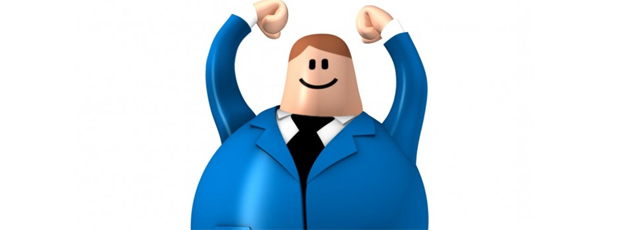

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [173]:
dichtheid = 1.03
limbs = (12.4+8.7+3.2)
#is limbs een vaste waarde? 

radius = ((xdata)**3)

def massa(dichtheid, radius, limbs):
    return(dichtheid * radius + limbs)

print(massa)

<function massa at 0x000002A4D758BEB0>


### Stap 2: Fit data

In [211]:
# Define our model

from scipy.optimize import curve_fit

xdata = np.linspace(1, 60, 61)
y = func(xdata, 0.1, 50, 0.5)
m = massa(dichtheid, xdata, limbs)

print(m)


[25.33       26.34283333 27.35566667 28.3685     29.38133333 30.39416667
 31.407      32.41983333 33.43266667 34.4455     35.45833333 36.47116667
 37.484      38.49683333 39.50966667 40.5225     41.53533333 42.54816667
 43.561      44.57383333 45.58666667 46.5995     47.61233333 48.62516667
 49.638      50.65083333 51.66366667 52.6765     53.68933333 54.70216667
 55.715      56.72783333 57.74066667 58.7535     59.76633333 60.77916667
 61.792      62.80483333 63.81766667 64.8305     65.84333333 66.85616667
 67.869      68.88183333 69.89466667 70.9075     71.92033333 72.93316667
 73.946      74.95883333 75.97166667 76.9845     77.99733333 79.01016667
 80.023      81.03583333 82.04866667 83.0615     84.07433333 85.08716667
 86.1       ]


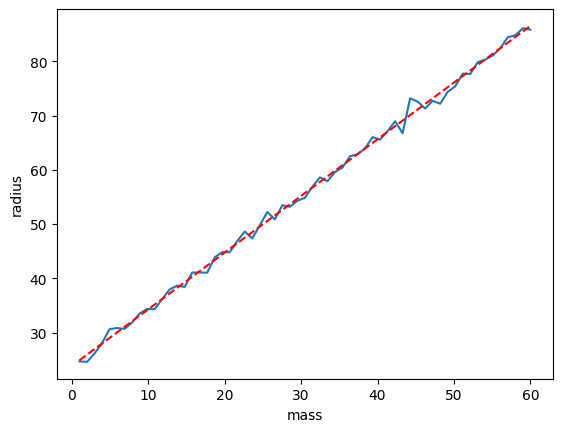

[24.72522762 24.61566496 26.1620315  28.0531496  30.65586854 30.86524182
 30.70037195 31.86865973 33.5185112  34.35121615 34.33062879 36.18062174
 37.96621814 38.66824623 38.42908232 41.07995839 41.09463904 41.04646073
 43.89262871 44.83680862 44.82729084 46.89843547 48.63736927 47.3625102
 49.78318097 52.23619103 50.87047807 53.479943   53.19583847 54.31097644
 54.83526716 56.89575475 58.62155406 57.90117581 59.59693965 60.43128138
 62.50664533 62.85314123 63.94901121 66.02184109 65.57560558 67.10556339
 68.95215996 66.74318793 73.18539587 72.56217132 71.3012448  72.72029368
 72.17488452 74.36052572 75.37935795 77.72058582 77.65424273 79.82609124
 80.3145451  81.07349754 82.40950547 84.4236449  84.78253935 86.07838112
 85.82166066]
[ 1.04398127 23.87039341]


In [212]:
rng = np.random.default_rng()
mass_noise = 1 * rng.normal(size=xdata.size)

massdata = mass_noise + m

popt, pcov = curve_fit(massa, xdata, massdata)
plt.plot(xdata, massdata)
plt.plot(xdata, massa(xdata, * popt), 'r--',
         label='fit: dichtheid=%s, radius=%s' % tuple(popt))

plt.xlabel('mass')
plt.ylabel('radius')
plt.show()

print(massdata)
print(popt)




## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861